<a href="https://colab.research.google.com/github/arijul2/Parkinson-s_Detection_ML/blob/main/ParkinsonsDiseaseDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Parkinson's Spiral Drawing and CNN to Detect Parkinson's Disease

In [1]:
import numpy as np

In [2]:
import cv2

In [3]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam, SGD


In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


In [5]:
import seaborn as sns
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import pandas as pd

Loading the Data

In [7]:
data_train = np.load('Parkinson_disease_detection/train_set.npz', allow_pickle=True)
x_train = data_train['arr_0']
y_train = data_train['arr_1']

print(x_train.shape)
print(y_train.shape)


(72, 256, 256, 3)
(72,)


In [6]:
!wget https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/Parkinson_disease_detection.zip
!unzip -qo Parkinson_disease_detection.zip

--2024-08-07 19:21:17--  https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/Parkinson_disease_detection.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.156.175, 52.219.158.83, 16.12.36.91, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.156.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8201907 (7.8M) [application/x-zip-compressed]
Saving to: ‘Parkinson_disease_detection.zip’

Parkinson_disease_d 100%[===================>]   7.82M  4.45MB/s    in 1.8s    

2024-08-07 19:21:19 (4.45 MB/s) - ‘Parkinson_disease_detection.zip’ saved [8201907/8201907]



In [8]:
data_test = np.load('Parkinson_disease_detection/test_set.npz', allow_pickle=True)
x_test = data_test['arr_0']
y_test = data_test['arr_1']

print(x_test.shape)
print(y_test.shape)

(30, 256, 256, 3)
(30,)


Data Distribution

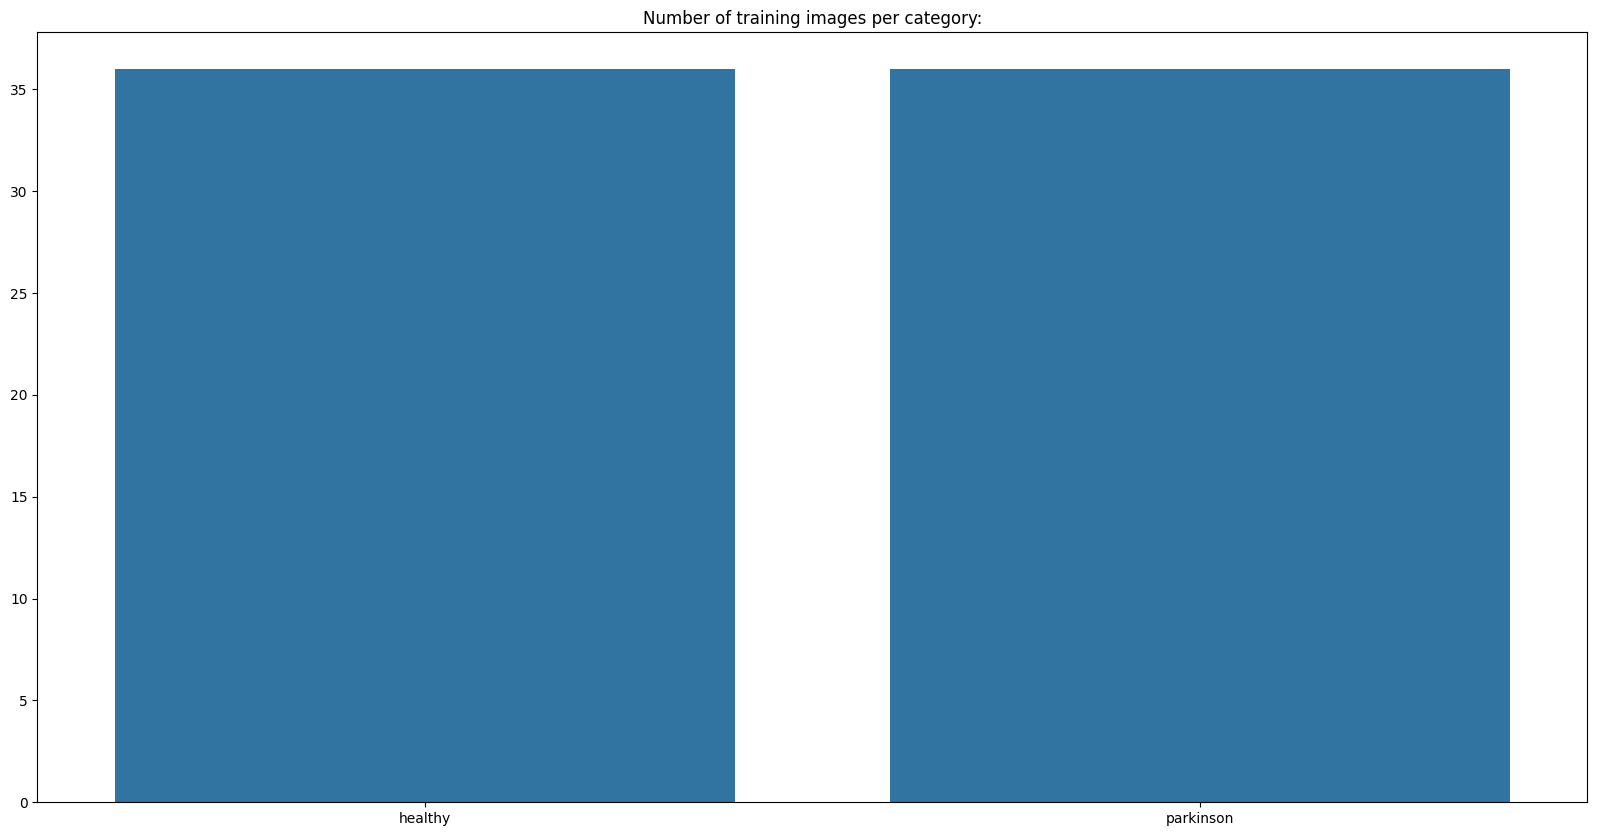

In [20]:
unique_train, count = np.unique(y_train, return_counts=True)
plt.figure(figsize=(20, 10))
sns.barplot(x=unique_train, y=count).set_title("Number of training images per category:")
plt.show()